<h1>Práctica 2</h1>

<i>
Maximiliano Vaca Montejano <br>
364897 <br>
maximiliano.vaca@uabc.edu.mx
</i>

<i>Profesor: Andrés García Medina <br>
andres.garcia.medina@uabc.edu.mx <br>
Fecha de entrega: jueves 29 de febrero, 2024 (12pm) </i>

<h2>Ejercicio 1 </h2>
Considere nuevamente el modelo del ejercicio 2 de la practica 1 dado por: 

$$ dist_i = \beta_0 + \beta_1 speed_i + \beta_2 speed_i^2 + \epsilon$$

In [12]:
data(cars)
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


<b>(a) Usar el metodo pairs para graficar los datos e interpretar. </b>

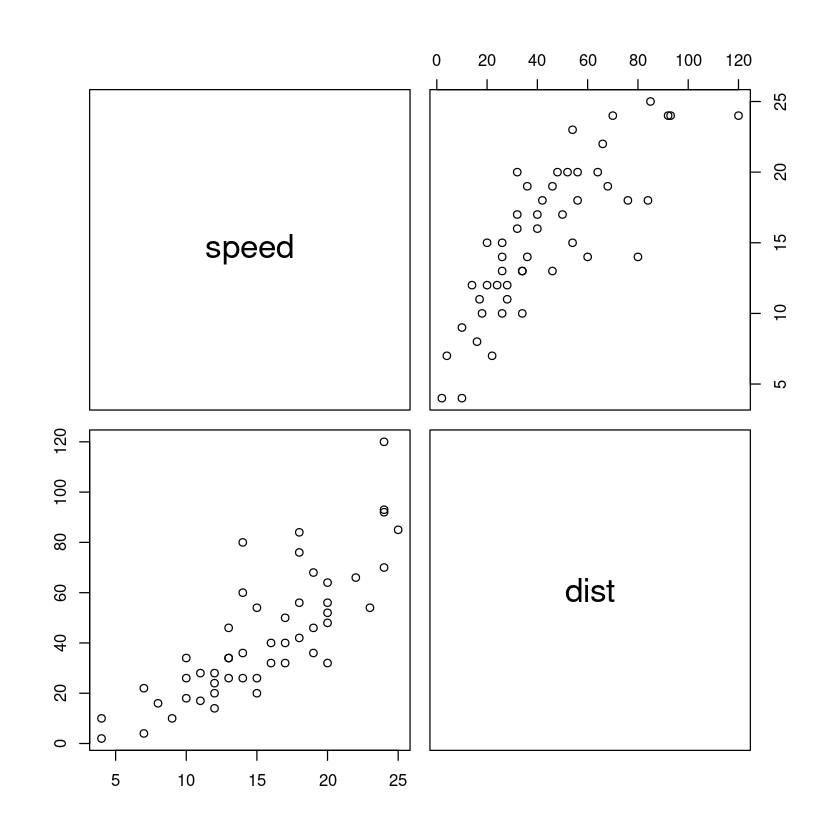

In [13]:
pairs(cars)

<b>(b) Graficar la matriz de covarianza de la matriz de diseño asociada X como un mapa de calor con la función heatmap.


In [ ]:
#dividimos los datos: 
#x <- cars$speed
#y <- cars$dist

In [41]:
X <- model.matrix(dist ~ speed + I(speed^2), data=cars)
y <- cars$dist
dim(X)
head(X)
tail(X)

[1] 50  3

,(Intercept),speed,I(speed^2)
1,1,4,16
2,1,4,16
3,1,7,49
4,1,7,49
5,1,8,64
6,1,9,81


,(Intercept),speed,I(speed^2)
45,1,23,529
46,1,24,576
47,1,24,576
48,1,24,576
49,1,24,576
50,1,25,625


In [42]:
cov_X <- cov(X)
cov_X

,(Intercept),speed,I(speed^2)
(Intercept),0,0.00000,0.0000
speed,0,27.95918,844.4653
I(speed^2),0,844.46531,26585.8841


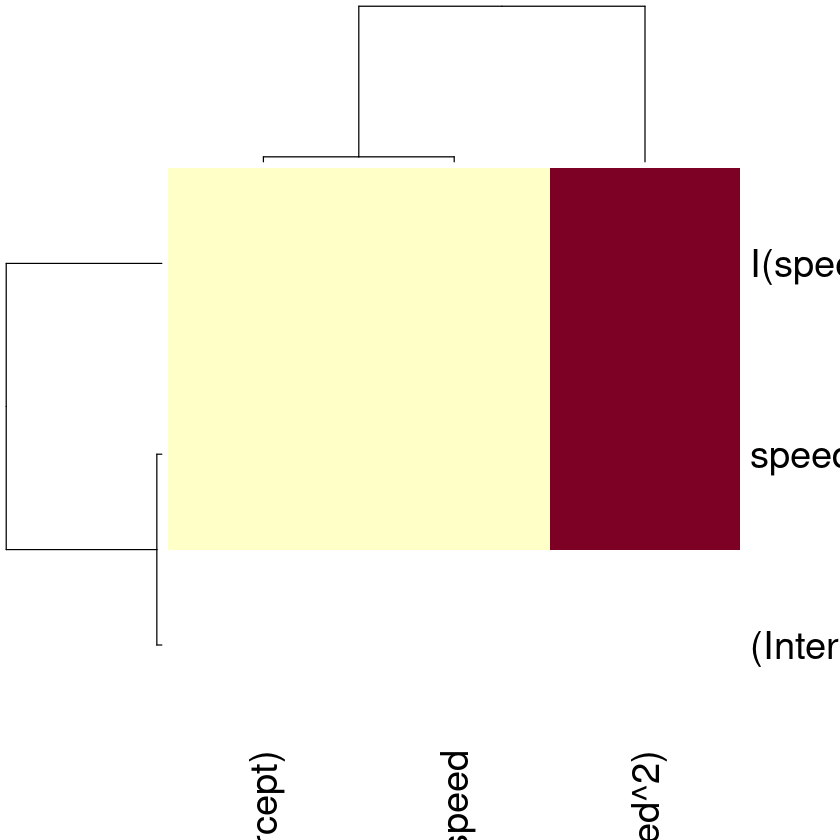

In [36]:
heatmap(cov_X)

<b>(c) Estimar el vector β del modelo via la factorización QR y comparar con resultado de la función lm. Se puede apoyar de la función qr.


In [43]:
beta_qr <- qr.solve(X, y)
beta_qr

(Intercept)       speed  I(speed^2) 
  2.4701378   0.9132876   0.0999593

In [51]:
cars.mod <- lm(dist ~ speed + I(speed^2), data=cars)

#summary(cars.mod_1)
coef(cars.mod)

(Intercept)       speed  I(speed^2) 
  2.4701378   0.9132876   0.0999593

<b>(d) Historicamente la solución  ́optima del vector β está dada por la expresión: 
$β = (X^T X)^{−1} X^T y$. 
Estimar el vector β via la expresion anterior (método clásico) y comparar con los resultados obtenidos via qr y la función lm.


In [50]:
beta_clas = solve ( t(X) %*% X ) %*% t(X) %*% y

print(beta_clas)

                 [,1]
(Intercept) 2.4701378
speed       0.9132876
I(speed^2)  0.0999593


<b>(e) Grafique los residuales del modelo ajustado ¿Cumplen con los supuestos
distribucionales? ¿Con esta información como estimar ́ıa la desviación
estándar de cada elemento de β?

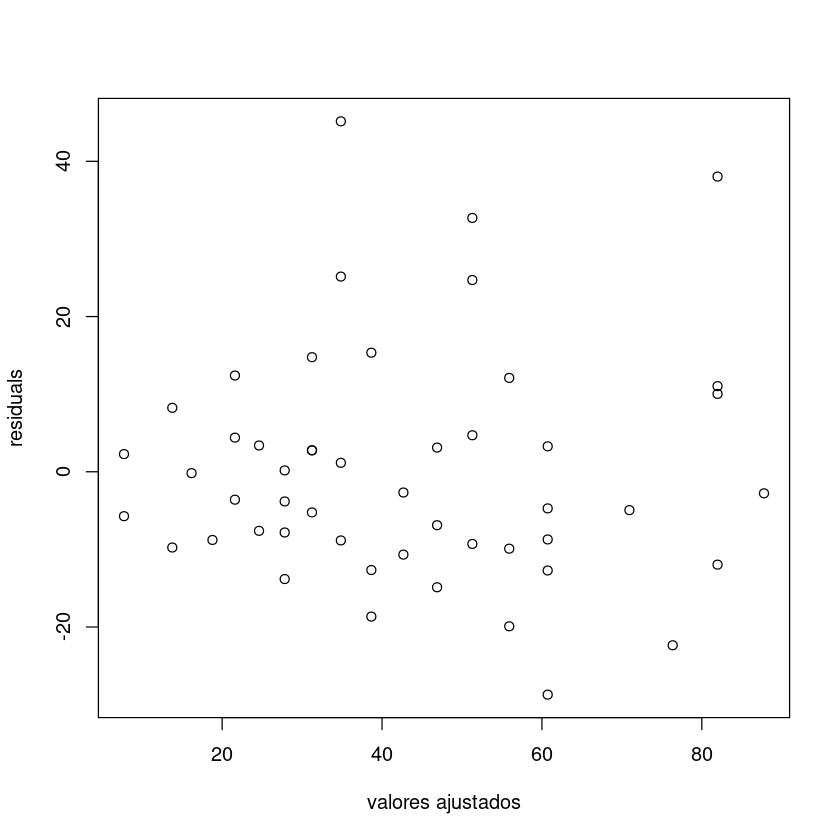

In [52]:
plot(fitted(cars.mod), residuals(cars.mod), xlab="valores ajustados", ylab="residuals")